# 📊 Coffee Shop Data Preparation  

This notebook is dedicated to **cleaning and preparing coffee shop transaction data**.  
The primary objective is to structure the dataset for **SQL analysis and queries**, ensuring it is ready for deeper business insights.  

### 🔍 Scope of Work:
- **Exploratory Data Analysis (EDA)** → Understanding patterns and distributions  
- **Data Cleaning** → Handling missing values, nulls, incomplete records, outliers, duplicates, noisy data, inconsistent entries, scaling, and standardization  
-------------
-------------
# 📊 About Dataset

This notebook explores a dataset of **coffee shop transactions**,  
The dataset provides detailed insights into **customer behavior, sales performance, and purchasing trends** across different time periods and coffee types.  

### 🔍 Key Features:
- **File**: Coffe_sales.csv
- **Records**: 3,547 sales transactions
### 🔍 Columns:
1. **hour_of_day** → Hour of purchase (0–23)  
2. **cash_type** → Mode of payment (Cash / Card)  
3. **money** → Transaction amount (in local currency)  
4. **coffee_name** → Type of coffee purchased (e.g., Latte, Americano, Hot Chocolate)  
5. **Time_of_Day** → Categorized time of purchase (Morning, Afternoon, Night)  
6. **Weekday** → Day of the week (Mon–Sun)  
7. **Month_name** → Month of purchase (Jan–Dec)  
8. **Weekdaysort** → Numeric weekday order (1 = Mon, …, 7 = Sun)  
9. **Monthsort** → Numeric month order (1 = Jan, …, 12 = Dec)  
 10. **Date** → Transaction date (YYYY-MM-DD)  
11. **Time** → Exact transaction time (HH:MM:SS)  

## import libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Initial Exploration


In [ ]:
# Load the dataset

df = pd.read_csv('Coffe_sales.csv')

# Display basic information about the dataset

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (3547, 11)

Column Names:
['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time']

First 5 rows:


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


# 1. Exploratory Data Analysis (EDA)

In [3]:
# Basic dataset information

print("Dataset Info")
print(df.info())

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None


### Check unique values in **categorical** columns


In [4]:
# Check unique values in categorical columns

print("Unique values in categorical columns:")
print("\nCash Type:", df['cash_type'].unique())
print("\nCoffee Names:", df['coffee_name'].unique())
print("\nTime of Day:", df['Time_of_Day'].unique())
print("\nWeekdays:", df['Weekday'].unique())
print("\nMonths:", df['Month_name'].unique())


Unique values in categorical columns:

Cash Type: ['card']

Coffee Names: ['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']

Time of Day: ['Morning' 'Afternoon' 'Night']

Weekdays: ['Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu']

Months: ['Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb']


In [5]:
# Display summary statistics for all numeric columns in the dataset
# This analysis is inaccurate and logically incorrect,
# because the first, third, and fourth columns represent Numerical, not values.

print("Dataset Description:")
print(df.describe())

Dataset Description:
       hour_of_day        money  Weekdaysort    Monthsort
count  3547.000000  3547.000000  3547.000000  3547.000000
mean     14.185791    31.645216     3.845785     6.453905
std       4.234010     4.877754     1.971501     3.500754
min       6.000000    18.120000     1.000000     1.000000
25%      10.000000    27.920000     2.000000     3.000000
50%      14.000000    32.820000     4.000000     7.000000
75%      18.000000    35.760000     6.000000    10.000000
max      22.000000    38.700000     7.000000    12.000000


# 2. Data Cleaning


In [6]:
# Find Missing Values

print("Missing Values:")
print(df.isnull().sum())

Missing Values:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [7]:
# FIXED: Data cleaning with proper datetime handling
df_clean = df.copy()

# Convert Date and Time columns to proper datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Handle Time column with mixed formats (some with microseconds, some without)
df_clean['Time'] = pd.to_datetime(df_clean['Time'], format='mixed').dt.time

# Create a combined datetime column
df_clean['DateTime'] = pd.to_datetime(df_clean['Date'].astype(str) + ' ' + df_clean['Time'].astype(str), format='mixed')

# Check for duplicates
print("Number of duplicate rows:", df_clean.duplicated().sum())

# Remove duplicates if any
df_clean = df_clean.drop_duplicates()
print("Dataset shape after removing duplicates:", df_clean.shape)

# Check for outliers in money column using (IQR)
Q1 = df_clean['money'].quantile(0.25)
Q3 = df_clean['money'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nMoney column statistics:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print(f"Outliers count: {((df_clean['money'] < lower_bound) | (df_clean['money'] > upper_bound)).sum()}")

Number of duplicate rows: 0
Dataset shape after removing duplicates: (3547, 12)

Money column statistics:
Q1: 27.92, Q3: 35.76, IQR: 7.839999999999996
Lower bound: 16.160000000000007, Upper bound: 47.519999999999996
Outliers count: 0


In [8]:
# Create additional features for analysis
df_clean['day_of_week'] = df_clean['DateTime'].dt.day_name()
df_clean['month'] = df_clean['DateTime'].dt.month
df_clean['day_of_month'] = df_clean['DateTime'].dt.day
df_clean['is_weekend'] = df_clean['DateTime'].dt.dayofweek.isin([5, 6])

# Create price categories
df_clean['price_category'] = pd.cut(df_clean['money'],
                                   bins=[0, 30, 35, 40, 100],
                                   labels=['Low', 'Medium', 'High', 'Premium'])

print("Additional features created successfully!")
print("\nPrice category distribution:")
print(df_clean['price_category'].value_counts())

Additional features created successfully!

Price category distribution:
price_category
High       1415
Low        1202
Medium      930
Premium       0
Name: count, dtype: int64


In [9]:
df_clean.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,DateTime,day_of_week,month,day_of_month,is_weekend,price_category
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,2024-03-01 10:15:50.520,Friday,3,1,False,High
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,2024-03-01 12:19:22.539,Friday,3,1,False,High
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,2024-03-01 12:20:18.089,Friday,3,1,False,High
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,2024-03-01 13:46:33.006,Friday,3,1,False,Low
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,2024-03-01 13:48:14.626,Friday,3,1,False,High


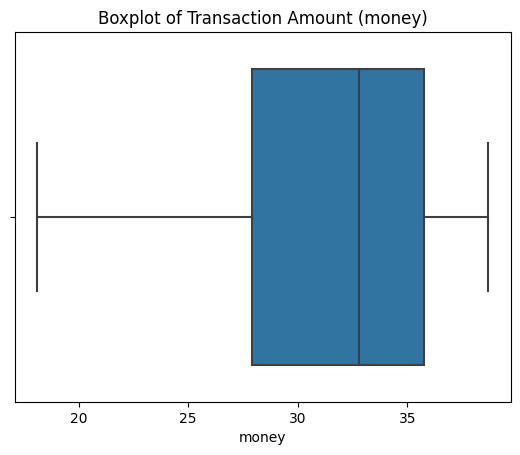

Number of potential outliers in 'money': 0

Unique values in 'cash_type':
['card']

Unique values in 'coffee_name':
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']

Unique values in 'Time_of_Day':
['Morning' 'Afternoon' 'Night']

Unique values in 'Weekday':
['Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu']

Unique values in 'Month_name':
['Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb']

Range of 'money': 18.12 → 38.7
Range of 'hour_of_day': 6 → 22
Range of 'Weekdaysort': 1 → 7
Range of 'Monthsort': 1 → 12


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# =========================================
# 1. Check for Noisy Data (Outliers)
# =========================================

# Boxplot to visually check for outliers in transaction amount
sns.boxplot(x=df_clean['money'])
plt.title("Boxplot of Transaction Amount (money)")
plt.show()

# Z-score method to detect outliers
z_scores = np.abs(stats.zscore(df_clean['money']))
print("Number of potential outliers in 'money':", (z_scores > 3).sum())

# =========================================
# 2. Check for Inconsistent Entries
# =========================================

# Print unique values in categorical columns
print("\nUnique values in 'cash_type':")
print(df_clean['cash_type'].unique())

print("\nUnique values in 'coffee_name':")
print(df_clean['coffee_name'].unique())

print("\nUnique values in 'Time_of_Day':")
print(df_clean['Time_of_Day'].unique())

print("\nUnique values in 'Weekday':")
print(df_clean['Weekday'].unique())

print("\nUnique values in 'Month_name':")
print(df_clean['Month_name'].unique())

# =========================================
# 3. Check for Scaling Issues
# =========================================

# Compare ranges between key numeric columns
print("\nRange of 'money':", df_clean['money'].min(), "→", df_clean['money'].max())
print("Range of 'hour_of_day':", df_clean['hour_of_day'].min(), "→", df_clean['hour_of_day'].max())
print("Range of 'Weekdaysort':", df_clean['Weekdaysort'].min(), "→", df_clean['Weekdaysort'].max())
print("Range of 'Monthsort':", df_clean['Monthsort'].min(), "→", df_clean['Monthsort'].max())


## Save cleaned data as CSV for SQL use


In [11]:
# Save cleaned data as CSV for SQL use
df_clean.to_csv("cleaned_data.csv", index=False)




### Perfect

# End